In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Step 1: load and inspect the dataset

In [6]:
df2 = pd.read_csv('/content/20222703 Causes Of Death Clean Output V2.0.csv')

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201762 entries, 0 to 201761
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Causes name              201762 non-null  object 
 1   Causes Full Description  201762 non-null  object 
 2   Death Numbers            190575 non-null  float64
 3   Entity                   201762 non-null  object 
 4   Code                     200277 non-null  object 
 5   Year                     201762 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 9.2+ MB


In [8]:
df2.head()

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007


Step 2: Clean the dataset

In [9]:
df2.isnull().sum()

,0
Causes name,0
Causes Full Description,0
Death Numbers,11187
Entity,0
Code,1485
Year,0


In [10]:
df2.dropna(inplace=True)

In [11]:
df2.isnull().sum()

,0
Causes name,0
Causes Full Description,0
Death Numbers,0
Entity,0
Code,0
Year,0


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189630 entries, 0 to 201760
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Causes name              189630 non-null  object 
 1   Causes Full Description  189630 non-null  object 
 2   Death Numbers            189630 non-null  float64
 3   Entity                   189630 non-null  object 
 4   Code                     189630 non-null  object 
 5   Year                     189630 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 10.1+ MB


In [13]:
df2['Death Numbers'] = df2['Death Numbers'].astype(int)
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189630 entries, 0 to 201760
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Causes name              189630 non-null  object        
 1   Causes Full Description  189630 non-null  object        
 2   Death Numbers            189630 non-null  int64         
 3   Entity                   189630 non-null  object        
 4   Code                     189630 non-null  object        
 5   Year                     189630 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 10.1+ MB


In [15]:
df2.duplicated().sum()

0

Step 3: Exploratory Data Analysis



*   Top 10 causes of death globally



In [16]:
top_causes = df2.groupby('Causes name')['Death Numbers'].sum().sort_values(ascending=False).head(10)
top_causes

,Death Numbers
Causes name,
Cardiovascular diseases,447185738
Neoplasms,229503682
Chronic respiratory diseases,104502658
Lower respiratory infections,83146095
Neonatal disorders,76099923
Diarrheal diseases,65867214
Digestive diseases,65461101
Tuberculosis,45606215
Cirrhosis and other chronic liver diseases,37372823


graphical representation

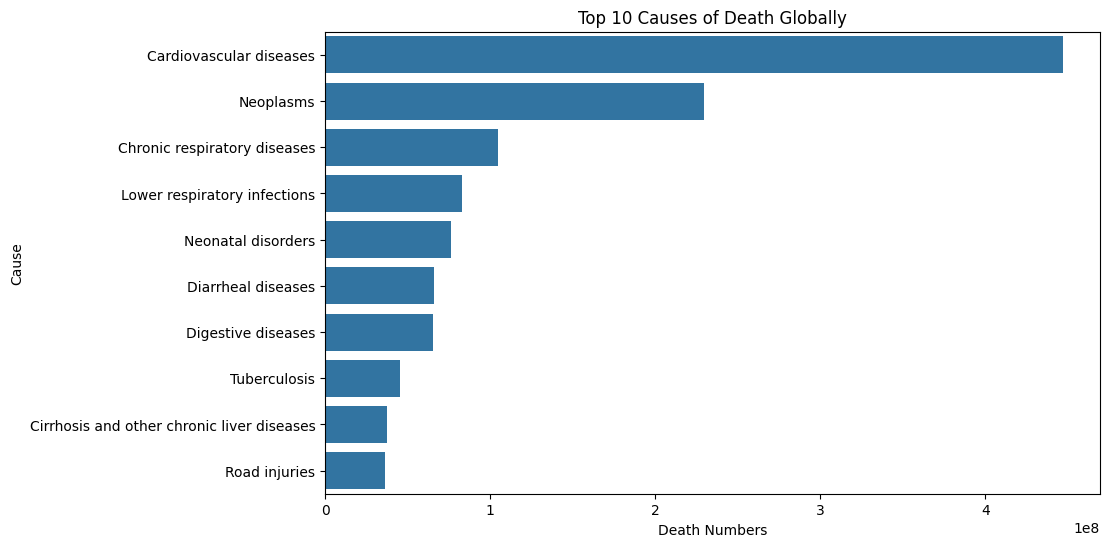

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_causes.values, y=top_causes.index)
plt.title('Top 10 Causes of Death Globally')
plt.xlabel('Death Numbers')
plt.ylabel('Cause')
plt.show()

*   death trends over the years for top causes





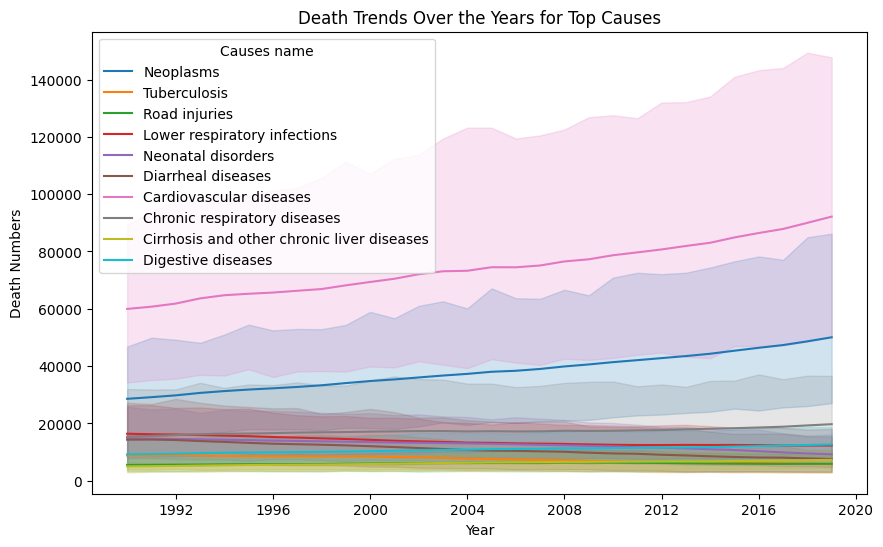

In [18]:
top_cause_trends = df2[df2['Causes name'].isin(top_causes.index)]
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Death Numbers', hue='Causes name', data=top_cause_trends)
plt.title('Death Trends Over the Years for Top Causes')
plt.show()

*  Top causes of death by country




In [21]:
top_causes_by_country = df2.groupby(['Entity', 'Causes name'])['Death Numbers'].sum().reset_index()
top_causes_by_country = top_causes_by_country.sort_values(by='Death Numbers', ascending=False)
top_causes_by_country.head(10)

,Entity,Causes name,Death Numbers
1188,China,Cardiovascular diseases,100505973
1208,China,Neoplasms,61060528
2569,India,Cardiovascular diseases,52994710
1190,China,Chronic respiratory diseases,36676826
4722,Russia,Cardiovascular diseases,33903781
6131,United States,Cardiovascular diseases,26438346
2575,India,Diarrheal diseases,26243547
2571,India,Chronic respiratory diseases,25232974
2588,India,Neonatal disorders,20911570
6151,United States,Neoplasms,18905315


* Year-over-year percentage change in deaths due to specific causes

In [24]:
df2_cause = df2[df2['Causes name'] == 'Cardiovascular diseases']
df2_cause['Percentage Change'] = df2_cause['Death Numbers'].pct_change() * 100
df2_cause

<ipython-input-24-9d61291d1ba5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cause['Percentage Change'] = df2_cause['Death Numbers'].pct_change() * 100


,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year,Percentage Change
24,Cardiovascular diseases,Deaths - Cardiovascular diseases - Sex: Both -...,53962,Afghanistan,AFG,2007-01-01,NaN
57,Cardiovascular diseases,Deaths - Cardiovascular diseases - Sex: Both -...,54051,Afghanistan,AFG,2008-01-01,0.164931
90,Cardiovascular diseases,Deaths - Cardiovascular diseases - Sex: Both -...,53964,Afghanistan,AFG,2009-01-01,-0.160959
123,Cardiovascular diseases,Deaths - Cardiovascular diseases - Sex: Both -...,54347,Afghanistan,AFG,2011-01-01,0.709732
156,Cardiovascular diseases,Deaths - Cardiovascular diseases - Sex: Both -...,54868,Afghanistan,AFG,2012-01-01,0.958655
...,...,...,...,...,...,...,...
201621,Cardiovascular diseases,Deaths - Cardiovascular diseases - Sex: Both -...,16649,Zimbabwe,ZWE,2015-01-01,1.791392
201654,Cardiovascular diseases,Deaths - Cardiovascular diseases - Sex: Both -...,16937,Zimbabwe,ZWE,2016-01-01,1.729834
201687,Cardiovascular diseases,Deaths - Cardiovascular diseases - Sex: Both -...,17187,Zimbabwe,ZWE,2017-01-01,1.476058
201720,Cardiovascular diseases,Deaths - Cardiovascular diseases - Sex: Both -...,17460,Zimbabwe,ZWE,2018-01-01,1.588410


graphical representation

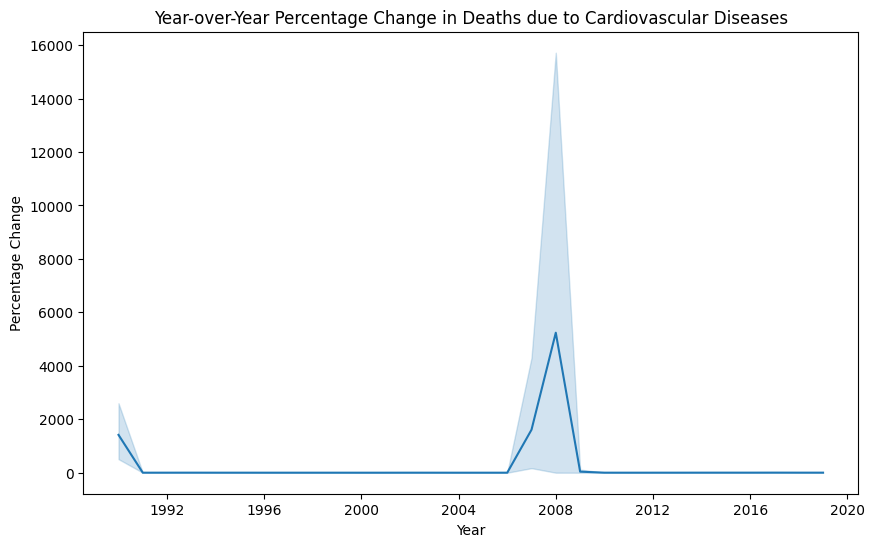

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Percentage Change', data=df2_cause)
plt.title('Year-over-Year Percentage Change in Deaths due to Cardiovascular Diseases')
plt.show()

In [27]:
df2.to_csv('cleaned_causes_of_death.csv', index=False)